In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
import pandas as pd
df = pd.read_csv('ChurnData.csv')
df.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
x = df.drop('churn', axis=1)
y = df['churn']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [36]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\Siddhit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
pred_prob = model.predict_proba(x_test)

In [38]:
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

random_prob = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_prob, pos_label=1)

In [39]:
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print("Auc_score =", auc_score)

Auc_score = 0.7382445141065831


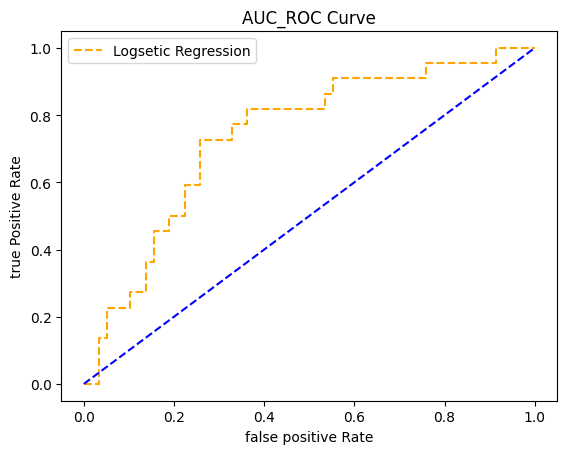

In [40]:
plt.style.use('default')  # Or any other valid style

plt.plot(fpr, tpr, linestyle='--', color='orange', label='Logsetic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('AUC_ROC Curve')
plt.xlabel('false positive Rate')
plt.ylabel('true Positive Rate')
plt.legend(loc='best')
plt.savefig('ROc', dpi=300)
plt.show()